# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=clyde%20river
Processing Record 2 of Set 1 | krumbach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=krumbach
Processing Record 3 of Set 1 | agirish
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=agirish
Processing Record 4 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rikitea
Processing Record 5 of Set 1 | novopokrovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=novopokrovka
Processing Record 6 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=belushya%20guba
City

Processing Record 2 of Set 2 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=barentsburg
City not found. Skipping...
Processing Record 3 of Set 2 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaitupu
City not found. Skipping...
Processing Record 4 of Set 2 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bethel
Processing Record 5 of Set 2 | lerik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lerik
Processing Record 6 of Set 2 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rocha
Processing Record 7 of Set 2 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mahebourg
Processing Record 8 of Set 2 | hami
http:/

Processing Record 4 of Set 3 | inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=inta
Processing Record 5 of Set 3 | hoi an
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hoi%20an
Processing Record 6 of Set 3 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=alice%20springs
Processing Record 7 of Set 3 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=shingu
Processing Record 8 of Set 3 | bangui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bangui
Processing Record 9 of Set 3 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=thompson
Processing Record 10 of Set 3 | nizhnyaya omka
http://api.openweathermap.org/data/2.5/weather?

Processing Record 7 of Set 4 | mudbidri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mudbidri
Processing Record 8 of Set 4 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20cristobal
Processing Record 9 of Set 4 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=touros
Processing Record 10 of Set 4 | sal rei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sal%20rei
Processing Record 11 of Set 4 | coffs harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=coffs%20harbour
Processing Record 12 of Set 4 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=atar
Processing Record 13 of Set 4 | fairhope
http://api.openweathermap.org/da

Processing Record 10 of Set 5 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port%20blair
Processing Record 11 of Set 5 | mata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mata
Processing Record 12 of Set 5 | ahmadpur east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ahmadpur%20east
Processing Record 13 of Set 5 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bowen
Processing Record 14 of Set 5 | esso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=esso
Processing Record 15 of Set 5 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=upernavik
Processing Record 16 of Set 5 | mansa
http://api.openweathermap.org/data/2.5/weather

Processing Record 13 of Set 6 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=araouane
Processing Record 14 of Set 6 | mawlaik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mawlaik
Processing Record 15 of Set 6 | merke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=merke
Processing Record 16 of Set 6 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=georgetown
Processing Record 17 of Set 6 | pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pangody
Processing Record 18 of Set 6 | emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=emerald
Processing Record 19 of Set 6 | srednekolymsk
http://api.openweathermap.org/data/2.5/weath

City not found. Skipping...
Processing Record 15 of Set 7 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sitka
Processing Record 16 of Set 7 | yanchukan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yanchukan
City not found. Skipping...
Processing Record 17 of Set 7 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=marawi
Processing Record 18 of Set 7 | matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=matara
Processing Record 19 of Set 7 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vila%20velha
Processing Record 20 of Set 7 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sept-iles
Processing Record 21 of Set 7 

Processing Record 18 of Set 8 | bijni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bijni
Processing Record 19 of Set 8 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hithadhoo
Processing Record 20 of Set 8 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20patricio
Processing Record 21 of Set 8 | churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=churapcha
Processing Record 22 of Set 8 | zella-mehlis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zella-mehlis
Processing Record 23 of Set 8 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=guerrero%20negro
Processing Record 24 of Set 8 | necochea
http://api.

Processing Record 20 of Set 9 | parabel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=parabel
Processing Record 21 of Set 9 | sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sumbe
Processing Record 22 of Set 9 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=naze
Processing Record 23 of Set 9 | yialos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yialos
City not found. Skipping...
Processing Record 24 of Set 9 | elda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=elda
Processing Record 25 of Set 9 | khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khash
Processing Record 26 of Set 9 | puerto del rosario
http://api.openweathermap.org/data/2.

Processing Record 23 of Set 10 | loa janan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=loa%20janan
Processing Record 24 of Set 10 | grants pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=grants%20pass
Processing Record 25 of Set 10 | eyrarbakki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=eyrarbakki
Processing Record 26 of Set 10 | lovington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lovington
Processing Record 27 of Set 10 | lieksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lieksa
Processing Record 28 of Set 10 | segou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=segou
Processing Record 29 of Set 10 | cedar city
http://api.openweatherma

Processing Record 25 of Set 11 | dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dali
Processing Record 26 of Set 11 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=acarau
City not found. Skipping...
Processing Record 27 of Set 11 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lompoc
Processing Record 28 of Set 11 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=urumqi
City not found. Skipping...
Processing Record 29 of Set 11 | kiruna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kiruna
Processing Record 30 of Set 11 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint-pierre
Processing Record 31 of Set 11 | meu

Processing Record 26 of Set 12 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hasaki
Processing Record 27 of Set 12 | chaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chaman
Processing Record 28 of Set 12 | kayseri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kayseri
Processing Record 29 of Set 12 | visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=visby
Processing Record 30 of Set 12 | kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kuching
Processing Record 31 of Set 12 | jieshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jieshi
Processing Record 32 of Set 12 | berbera
http://api.openweathermap.org/data/2.5/weather?units=Impe

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,clyde river,75,CA,1516507200,76,70.47,-68.59,-4.01,21.92
1,krumbach,40,DE,1516508400,94,48.24,10.36,33.80,3.36
2,agirish,20,RU,1516509607,68,61.92,63.02,-8.93,6.85
3,rikitea,32,PF,1516509607,99,-23.12,-134.97,80.63,12.10
4,novopokrovka,36,RU,1516509608,56,45.85,134.51,-1.01,7.63


## Latitude vs Temperature Plot

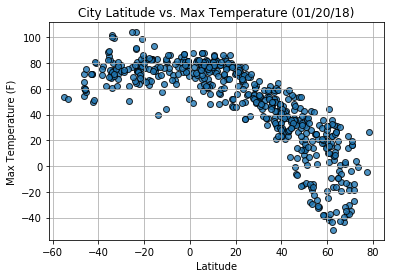

In [7]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

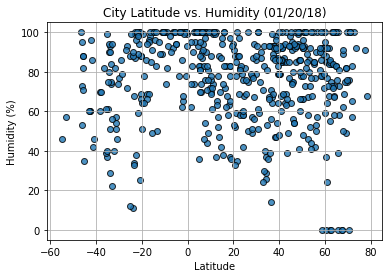

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

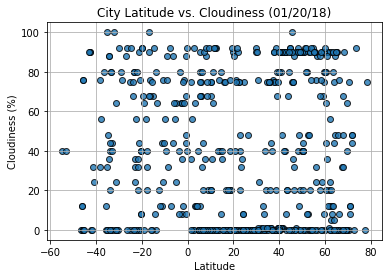

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

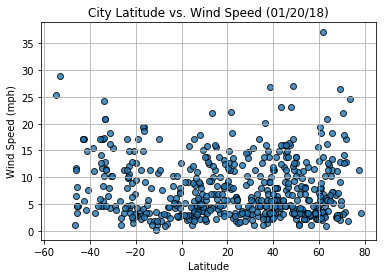

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()